# Bivariate Gaussian higher poly version of original

with the same equation ofc:

![image](images\multivariate_gaussian_euqation.png)

In [3]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install math

In [4]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
# choosing to centre around 0 as a default
points_in_pdf = 1000
range_in_pdf = 4

# also still in 2d atm should write a general case at some point
n = 2
covar = [[0.5, 0.1],
         [0.1, 0.5]]
inverse_covar = np.linalg.inv(covar)
det_covar = np.linalg.det(covar)

M = [0.5,0]
pi, e = math.pi, math.e
print(pi)
k = (((2*pi)**(n/2))*((det_covar)**(1/2)))**-1
print(k)

3.141592653589793
0.3248736671806984


61138.41361190121


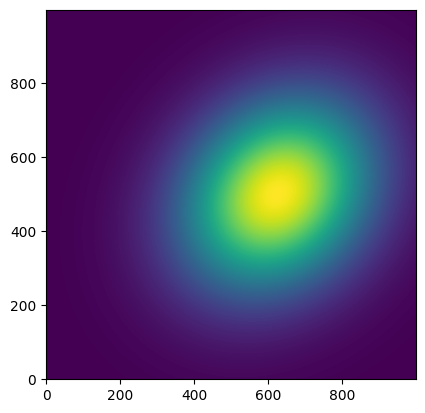

In [6]:
prob_dist = np.ones((points_in_pdf,points_in_pdf))

for i in range(points_in_pdf):
    x1 = -(range_in_pdf/2)+range_in_pdf*i/points_in_pdf
    for j in range(points_in_pdf):
        x2 = -(range_in_pdf/2)+range_in_pdf*j/points_in_pdf
        x = [x1,x2]

        x_minus_M = np.subtract(x,M)
        # the left matrix multiplication in the exponenet
        temp1 = np.linalg.matmul(x_minus_M.transpose(),inverse_covar)
        # the right matrix multiplication in the exponent (temp2 is a scalar so i assume my vectors are the correct shape)
        temp2 = np.linalg.matmul(temp1,x_minus_M)
        prob_dist[j][i] = (k*(e**(-0.5*temp2)))

#this is a checksum if most of ur pdf lies within ur range about 0,0 then this should be close to one       
print(sum(sum(prob_dist)))

# this gives a flipped image because the 0s don't start together (0,0) would be -2,-2
# to fix u use origin = 'lower' which puts both the 0s at the bottom
plt.imshow(prob_dist, origin='lower')

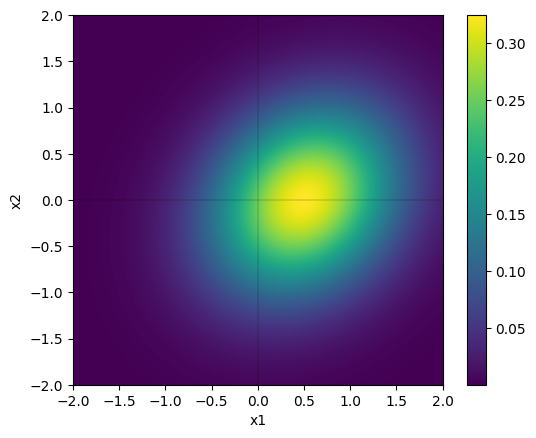

In [7]:
plt.imshow(prob_dist, extent=[-2, 2, -2, 2], origin='lower')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.axhline(0, color='black', linewidth=0.15)  # Horizontal line (y=0)
plt.axvline(0, color='black', linewidth=0.15)  # Vertical line (x=0)
plt.show()

# checksum
**if we consider each point as a bar coming up from the plain we can get the area of the pdf (approximately, but it will check that the maths is correct) we just need to figure out the area of each square**

the two points on the corners we will consider quarter squares, so for 1000 squares the range is across half of each corner and the other 998 so 999 total, (i think not that it really matters since this just needs to be approximately right)

probably worth saying that some 3d version of the trapeze rule would work better and get close to the actual value of the area (so 1)

In [13]:
area_per_point = ((1/(points_in_pdf-1))*range_in_pdf)**2
print(f'if all is correct this should be almost 1,  {(sum(sum(prob_dist)))*area_per_point}')
# ofc it should only be close to one if most of if not all of the non zero values of probability are inside of the range we set

if all is correct this should be almost 1,  0.9801739855876089


cool that only took 10 mins from the previous version, but the math checksum is implything that i am wrong since it sums to 62500 not 1 ...

## Problems

* the maths gives the correct shape (like its obviously a bivariate gaussian) but the maths is completely wrong according to the checksum ... probably need help with this one

# nvm

I'm stupid im just sampling the dist in discrete space why would i think a checksum would add to the acutal value of the prob of the continous function, what i have done could actually be correct maths but there isn't that much of a simplistic way to check, i guess i could match my vals in the covar matrix and means to someone elses and see if they have the same values in the centre and the same scale thing

# Next stuff to do
* fix the maths
* would be nice to get a version in 3 dims that is graphed,
* and then just make a general case that calcs for all multivariates and check the maths scales / gives a total of one, no graph for that tho as that sounds like a nightmare to visually represent